# Job salary correlations

# Part 1 - DEFINE

### ---- 1 Define the problem ----

A fresher graduate wants to know the correlations between salary and various job descriptions. This job description dataset has features available that can help narrow down a fresher's dream job search. What feature is most correlated with a job salary?

In [62]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



__author__ = "Skyler Bullard"
__email__ = "skylercarcom@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [63]:
#url = "https://...."
#df.read_csv(url, header=None)
#df.read_csv
#df.read_json
#df.read_xlsx

#load the data into a Pandas dataframe
test_df = pd.read_csv('data/test_features.csv')
train_features = pd.read_csv('data/train_features.csv')
train_salaries_df = pd.read_csv('data/train_salaries.csv')

### ---- 3 Clean the data ----

Here we find:

1) 1000000/1000000 unique jobIDs (no duplicates)

2) Each feature containing ZERO missing values


In [64]:
#join training data
df = pd.concat([train_features, train_salaries_df], axis=1, join='inner')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
jobId                  1000000 non-null object
salary                 1000000 non-null int64
dtypes: int64(3), object(7)
memory usage: 76.3+ MB


In [66]:
df.describe(include="all")

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobId,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,1000000,NaN
top,JOB1362684862776,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,JOB1362684862776,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,NaN,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,NaN,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,NaN,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,NaN,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,NaN,141.000000


In [67]:
    '''
    Without metadata, some features are not useful and should be removed
    '''
    
headers = ["Job" , "Company", "Type" , "Degree" , "Major" , "Industry" , "YearsExperience" , "DistanceMetropolis" ,"jobId" ,"Salary"]

df.columns = headers

df.drop( columns = ['Company' , 'jobId'] , axis = 1 , inplace = True)

df.head(10)

,Job,Type,Degree,Major,Industry,YearsExperience,DistanceMetropolis,Salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


### ---- 4 Explore the data (EDA) ----

In [68]:
#summarize each categorical feature variable

df.describe(include = ['O'])

,Job,Type,Degree,Major,Industry
count,1000000,1000000,1000000,1000000,1000000
unique,1000000,8,5,9,7
top,JOB1362684862776,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,125886,236976,532355,143206


In [69]:
#summarize each numeric feature variable

df.describe(include = [np.number])

,YearsExperience,DistanceMetropolis,Salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [70]:
#summarize the target variable

df.Salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: Salary, dtype: float64

In [71]:
#look for correlation between each feature and the target

np.unique(df.Type)

array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
       'VICE_PRESIDENT'], dtype=object)

In [72]:
select_type = df[ df['Type'] == "CEO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CEO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CEO salaries is  $145 ,000


In [73]:
select_type = df[ df['Type'] == "CFO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CFO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CFO salaries is  $135 ,000


In [74]:
select_type = df[ df['Type'] == "CTO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CTO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CTO salaries is  $135 ,000


In [75]:
select_type = df[ df['Type'] == "VICE_PRESIDENT" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of VICE_PRESIDENT salaries is " , "${:.0f}".format(mean), ",000")

The average salary of VICE_PRESIDENT salaries is  $125 ,000


In [76]:
select_type = df[ df['Type'] == "SENIOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of SENIOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of SENIOR salaries is  $105 ,000


In [77]:
select_type = df[ df['Type'] == "MANAGER" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of MANAGER salaries is " , "${:.0f}".format(mean), ",000")

The average salary of MANAGER salaries is  $115 ,000


In [78]:
select_type = df[ df['Type'] == "JUNIOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of JUNIOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of JUNIOR salaries is  $95 ,000


In [79]:
select_type = df[ df['Type'] == "JANITOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of JANITOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of JANITOR salaries is  $71 ,000


In [80]:
#list average salary for each job type in ascending order

avg_type_dict = {
    
    "JANITOR": "$71,000" ,
    "JUNIOR": "$95,000" ,
    "SENIOR": "$105,000" ,
    "MANAGER": "$115,000" ,
    "VP": "$125,000" ,
    "CTO": "$135,000" ,
    "CFO": "$135,000" ,
    "CEO": "$145,000" 

}

print( avg_type_dict)
print( "Average target: '$116,000'" )

{'JANITOR': '$71,000', 'JUNIOR': '$95,000', 'SENIOR': '$105,000', 'MANAGER': '$115,000', 'VP': '$125,000', 'CTO': '$135,000', 'CFO': '$135,000', 'CEO': '$145,000'}
Average target: '$116,000'


In [81]:
num_cols = [ 'YearsExperience' , 'DistanceMetropolis' , 'Salary']
num_df = df[ num_cols ]
num_df.head()

,YearsExperience,DistanceMetropolis,Salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163


In [82]:
#look for correlation between each feature

In [83]:
#plot the numerical data

def make_plots( df , col):
    
    plt.figure( figsize = ( 14 , 6 ) )
    plt.subplot( 1 , 2 , 1 )
    
    #fill first plot
    
    if df[ col ].dtype == 'int64':
        
        #find count of all unique values in the index
        #sort dataframe based on index lables
        #plot feature
        df[ col ].value_counts().sort_index().plot()
        
    else:
        
        #split data into group based on input parameter
        #select columns included in new df
        #find mean of each column index
        mean = df.groupby( col )[ 'Salary' ].mean()
        
        #change objects to categorical features
        df[ col ] = df[ col ].astype( 'category' )
        
        #find indeces of sorted values
        sort_mean = mean.sort_values().index.tolist()
        
        #reorder categories per sorted indeces
        df[ col ].cat.reorder_categories( sort_mean , inplace = True )
        
        df[ col ].value_counts().plot()
        
    plt.xticks( rotation = 45 )
    plt.xlabel( col )
    plt.ylabel( 'Counts' )
    
    #fill second plot 
    
    plt.subplot( 1 , 2 , 2 )
    
    if df[ col ].dtype == 'int64':
        
        #split data into group based on input parameter
        #select columns included in new df
        #find mean of each column index
        mean = df.groupby( col )[ 'Salary' ].mean()
        
        mean.plot()
    
    else:
        
        sns.boxplot( x = col , y = 'Salary' , data = df)
        
    plt.xticks( rotation = 45 )
    plt.ylabel( 'Salaries' )

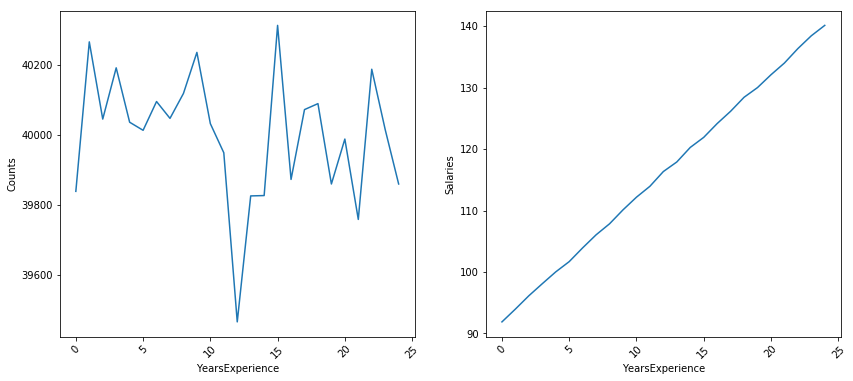

In [84]:
make_plots( num_df , 'YearsExperience' )

We find clear positive correlation between YearsExperience & Salary

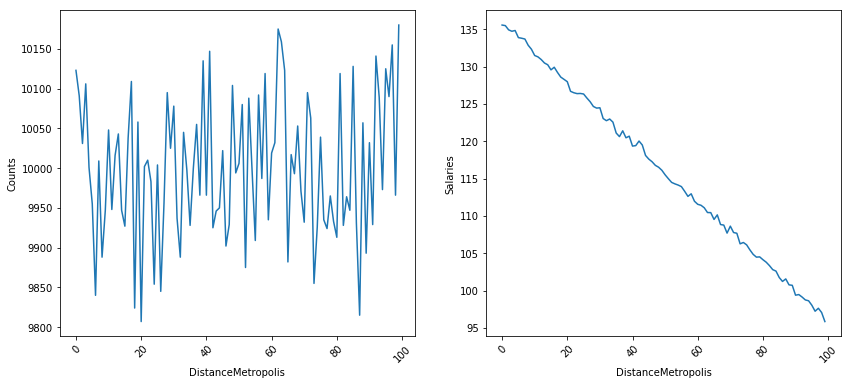

In [85]:
make_plots( num_df , 'DistanceMetropolis' )

We find clear negative correlation between DistanceFromMetropolis & Salary

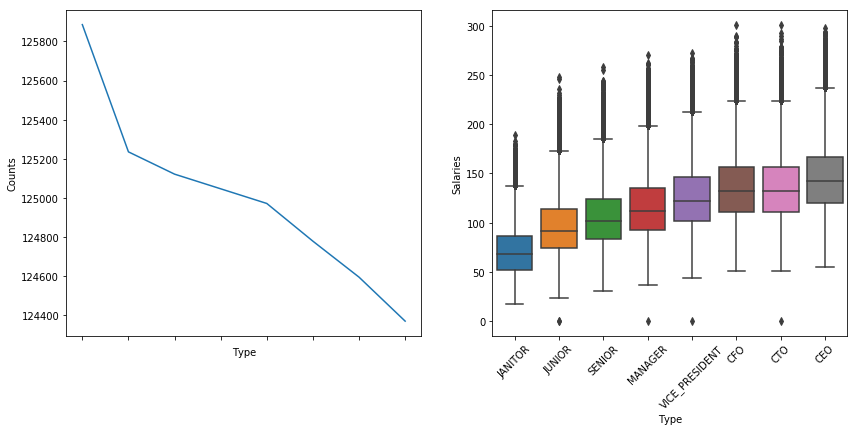

In [86]:
make_plots( df , 'Type' )

We find a positive correlation between Type & Salary

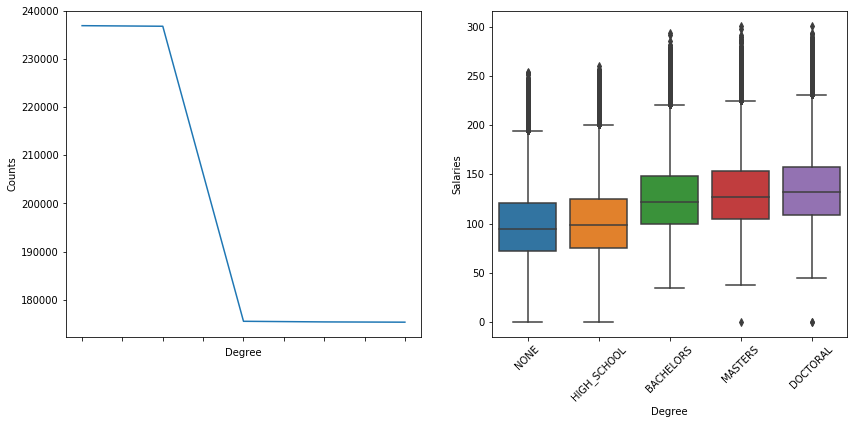

In [87]:
make_plots( df , 'Degree' )

We find a somewhat positive correation between Degree & Salary

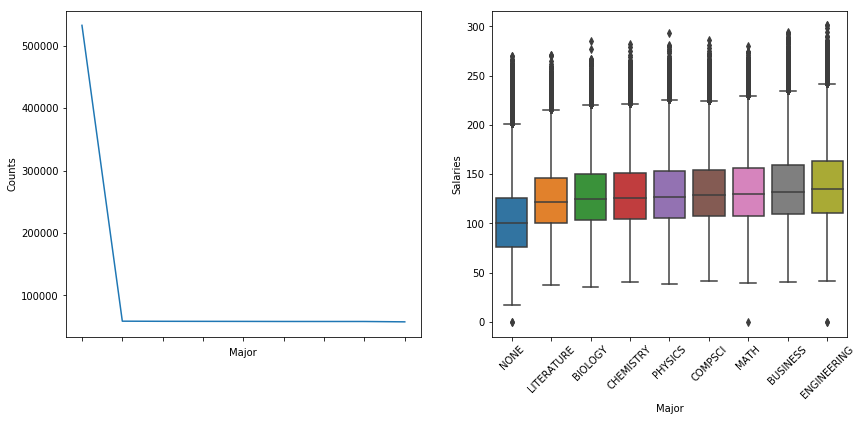

In [88]:
make_plots( df , 'Major' )

We find a somewhat positive correlation between Major & Salary

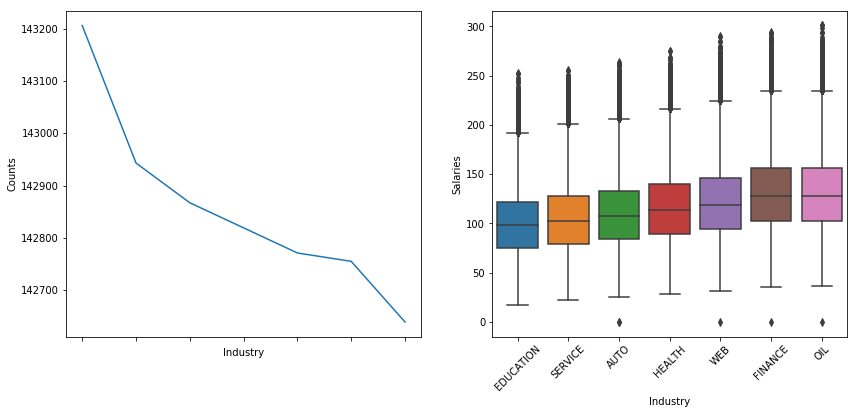

In [89]:
make_plots( df , 'Industry' )

We find a somewhat positive correlation between Industry & Salary

# We can infer that a 'Job Type' is most correlated with salary.